# Day 12 "Passage Pathing"

## Part 1

### Problem

With your submarine's subterranean subsystems subsisting suboptimally, the only way you're getting out of this cave anytime soon is by finding a path yourself. Not just a path - the only way to know if you've found the best path is to find all of them.

Fortunately, the sensors are still mostly working, and so you build a rough map of the remaining caves (your puzzle input). For example:

    start-A
    start-b
    A-c
    A-b
    b-d
    A-end
    b-end

This is a list of how all of the caves are connected. You start in the cave named start, and your destination is the cave named end. An entry like b-d means that cave b is connected to cave d - that is, you can move between them.

So, the above cave system looks roughly like this:

        start
        /   \
    c--A-----b--d
        \   /
        end

Your goal is to find the number of distinct paths that start at start, end at end, and don't visit small caves more than once. There are two types of caves: big caves (written in uppercase, like A) and small caves (written in lowercase, like b). It would be a waste of time to visit any small cave more than once, but big caves are large enough that it might be worth visiting them multiple times. So, all paths you find should visit small caves at most once, and can visit big caves any number of times.

Given these rules, there are 10 paths through this example cave system:

    start,A,b,A,c,A,end
    start,A,b,A,end
    start,A,b,end
    start,A,c,A,b,A,end
    start,A,c,A,b,end
    start,A,c,A,end
    start,A,end
    start,b,A,c,A,end
    start,b,A,end
    start,b,end

(Each line in the above list corresponds to a single path; the caves visited by that path are listed in the order they are visited and separated by commas.)

Note that in this cave system, cave d is never visited by any path: to do so, cave b would need to be visited twice (once on the way to cave d and a second time when returning from cave d), and since cave b is small, this is not allowed.

Here is a slightly larger example:

    dc-end
    HN-start
    start-kj
    dc-start
    dc-HN
    LN-dc
    HN-end
    kj-sa
    kj-HN
    kj-dc

The 19 paths through it are as follows:

    start,HN,dc,HN,end
    start,HN,dc,HN,kj,HN,end
    start,HN,dc,end
    start,HN,dc,kj,HN,end
    start,HN,end
    start,HN,kj,HN,dc,HN,end
    start,HN,kj,HN,dc,end
    start,HN,kj,HN,end
    start,HN,kj,dc,HN,end
    start,HN,kj,dc,end
    start,dc,HN,end
    start,dc,HN,kj,HN,end
    start,dc,end
    start,dc,kj,HN,end
    start,kj,HN,dc,HN,end
    start,kj,HN,dc,end
    start,kj,HN,end
    start,kj,dc,HN,end
    start,kj,dc,end

Finally, this even larger example has 226 paths through it:

    fs-end
    he-DX
    fs-he
    start-DX
    pj-DX
    end-zg
    zg-sl
    zg-pj
    pj-he
    RW-he
    fs-DX
    pj-RW
    zg-RW
    start-pj
    he-WI
    zg-he
    pj-fs
    start-RW

How many paths through this cave system are there that visit small caves at most once?

### Setup

In [1]:
from utils import *

_input = initDay('day12')

_sample1      = getMarkdown('For example')
_sample1part1 = getMarkdown('10 paths through')
_sample2      = getMarkdown('slightly larger example')
_sample2part1 = getMarkdown('19 paths through')
_sample3      = getMarkdown('226 paths through')
_sample1part2 = getMarkdown('36 possible paths through')

def parse(text):
    names = re.findall('\w+', text)
    nodes = {text:[] for text in names}
    for link in zip(it := iter(names), it):
        nodes[link[0]].append(link[1])
        nodes[link[1]].append(link[0])
    return nodes

### Solution

Build a graph and do depth-first search on it to collect the paths.

My initial implementation only returned counts and had a bit of logic at `end` to avoid the duplication as in (2a) of the Part 2 Solution.

Later I decided it's nice to validate against the sample answers, which requires recording all the paths for comparison. So in this version we build up the path as we go, adding it to the successful set on hitting `end`. We also use simple results deduplication to satisfy (2a). The code is simpler overall, though slower.

In [2]:
def solve(text, part):
    nodes, found, extravisit = parse(text), [], None

    def walk(name, path):
        path.append(name)

        for link in nodes[name]:
            nonlocal extravisit

            # record the completed path
            if link == 'end':
                found.append(','.join(path + [link]))
                continue

            # small caves only visit once, unless it's the "extravisit" cave
            small = link[0].islower()
            if small and link in path and (link != extravisit or path.count(link) == 2):
                continue

            # continue search
            walk(link, path)

            # part 2 optionally permits a single small cave per path an extra visit
            if part == 2 and small and not extravisit:
                extravisit = link
                walk(link, path)
                extravisit = None

        path.pop()

    walk('start', [])

    return sorted(dict.fromkeys(found))

def solve1(text):
    return len(solve(text, 1))

check(solve1(_sample1), 10)
assert solve(_sample1, 1) == _sample1part1.splitlines()

check(solve1(_sample2), 19)
assert solve(_sample2, 1) == _sample2part1.splitlines()

check(solve1(_sample3), 226)
check1(solve1(_input))

Part 1 Result: 4754


## Part 2

### Problem

After reviewing the available paths, you realize you might have time to visit a single small cave twice. Specifically, big caves can be visited any number of times, a single small cave can be visited at most twice, and the remaining small caves can be visited at most once. However, the caves named start and end can only be visited exactly once each: once you leave the start cave, you may not return to it, and once you reach the end cave, the path must end immediately.

Now, the 36 possible paths through the first example above are:

    start,A,b,A,b,A,c,A,end
    start,A,b,A,b,A,end
    start,A,b,A,b,end
    start,A,b,A,c,A,b,A,end
    start,A,b,A,c,A,b,end
    start,A,b,A,c,A,c,A,end
    start,A,b,A,c,A,end
    start,A,b,A,end
    start,A,b,d,b,A,c,A,end
    start,A,b,d,b,A,end
    start,A,b,d,b,end
    start,A,b,end
    start,A,c,A,b,A,b,A,end
    start,A,c,A,b,A,b,end
    start,A,c,A,b,A,c,A,end
    start,A,c,A,b,A,end
    start,A,c,A,b,d,b,A,end
    start,A,c,A,b,d,b,end
    start,A,c,A,b,end
    start,A,c,A,c,A,b,A,end
    start,A,c,A,c,A,b,end
    start,A,c,A,c,A,end
    start,A,c,A,end
    start,A,end
    start,b,A,b,A,c,A,end
    start,b,A,b,A,end
    start,b,A,b,end
    start,b,A,c,A,b,A,end
    start,b,A,c,A,b,end
    start,b,A,c,A,c,A,end
    start,b,A,c,A,end
    start,b,A,end
    start,b,d,b,A,c,A,end
    start,b,d,b,A,end
    start,b,d,b,end
    start,b,end

The slightly larger example above now has 103 paths through it, and the even larger example now has 3509 paths through it.

Given these new rules, how many paths through this cave system are there?

### Solution

Almost the same as Part 1, except we need to permit a double-visit of a single small cave on any given path.

Upon encountering a given small cave, there are now two possible branches:

1. The normal one-visit-permitted walk as in Part 1. The path from this point cannot contain this cave again.
2. The special two-visit-permitted walk. The path from this point can contain this cave exactly once again. And (2a) further, to avoid duplication with branch #1, the path from this point _must_ contain this cave again.

To satisfy (2a), we can simply remove duplicate paths from the results.

In [3]:
def solve2(text):
    return len(solve(text, 2))

check(solve2(_sample1), 36)
assert(solve(_sample1, 2)) == _sample1part2.splitlines()

check(solve2(_sample2), 103)
check(solve2(_sample3), 3509)
check2(solve2(_input))

Part 2 Result: 143562


## Graphs

For fun, here are the caves!

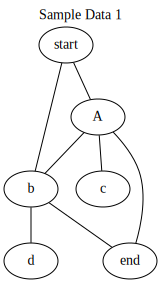

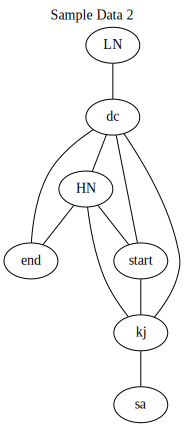

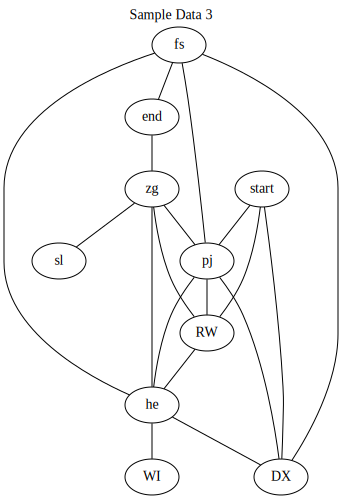

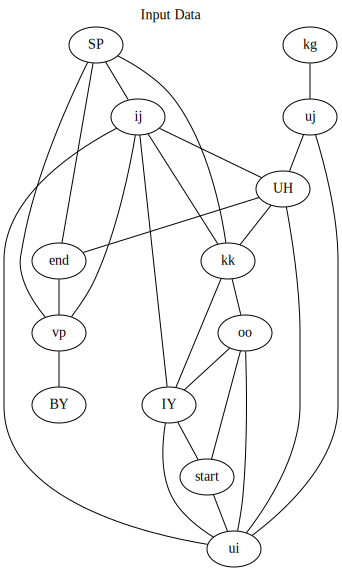

In [4]:
def graph(text, title):

    import graphviz
    dot = graphviz.Graph(body=f'''
        label     = "{title}"
        labelloc  =  t // t: Place the graph's title on top.
        ''')

    names = re.findall('\w+', text)
    for name in dict.fromkeys(names):
        dot.node(name)
    for link in zip(it := iter(names), it):
        dot.edge(link[0], link[1])

    display(dot)

graph(_sample1, "Sample Data 1")
graph(_sample2, "Sample Data 2")
graph(_sample3, "Sample Data 3")
graph(_input, "Input Data")